## Importing Libraries

In [2]:
%matplotlib notebook
%matplotlib inline
import scipy.constants as c # For physical and math constants
import math as mt # For math library
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import style
from PIL import Image
from sympy import *
from qutip import *
from pylab import *

## Number1
    Create a function that rotates the bulk magnetization vector.
    
- ***First 2 functions Below,*** we initiate a function that get us the <span style = "color: red;"> **magnetic moment of particle** </span> then use it to get our <span style = "color: red;"> **bulk vector** </span>
- ***Last function,*** we simulate <span style = "coloe: red;"> **bloch equation** </span> the recovery and decay exponential in both <span style = "color: blue;"> *z-plane* </span> and <span style = "color: blue;"> *x-y plane* </span>

In [2]:
# Get the value of magnetic moment vector
def Get_Mag(Geo, Spin_QNum):
    Angr_Momentum = c.hbar * mt.sqrt(Spin_QNum * (Spin_QNum + 1))
    MgMoment = Geo * Angr_Momentum
    return MgMoment

# Return the value of bulk magnetization vector
def Bulk(Spin_Num):
    bulk_vec = 0
    i = 1
    while i <= Spin_Num:
        bulk_vec = i * Get_Mag(42.0, 0.5)
        i += 1
    return bulk_vec * mt.exp(71)

Mxy = []
Mz = []
t1 = []
t2 = []

# Get the bloch equation
def Get_Bloch(Magnetic_Field, RecTime, DecTime):
    for j in range(0, 31):
        t1.append(j)
    for k in range(0, 9):
        t2.append(k)        
    i = 0
    while i <= len(t1) - 1:
        Longatudinal_Plane = Magnetic_Field * (1 - mt.exp((t1[i] * -1) / RecTime))
        Mz.append(Longatudinal_Plane)
        i += 1
    l = 0
    while l <= len(t2) - 1:
        Transverse_Plane = Magnetic_Field * mt.exp((t2[l] * -1) / DecTime)
        Mxy.append(Transverse_Plane)
        l += 1
    return Mz, Mxy

Get_Mag(42.6, 0.5); # For Hydrogen
Bulk(50); # Number of spins of hydrogen
Get_Bloch(1, 10.4, 1.06); # Bloch Equation (T1 and T2: CSF Material) # Avg
# Get_Bloch(1, 0.8, 0.11); # Bloch Equation (T1 and T2: CSF Material) # Min
# Get_Bloch(1, 20, 2); # Bloch Equation (T1 and T2: CSF Material) # Max

## Number2
    Plot the bulk magnetization’s trajectory and generate a figure representing the results.
    
- Figures below shows us the effect of <span style = "color: red;"> **T1 recovery time** </span> and <span style = "color: red;"> **T2 relaxation time** </span> for both <span style = "color: blue;"> *"Longitudinal Magnetization"* </span> and <span style = "color: blue;"> *"Transverse Magnetization"* </span>
- Later function show the <span style = "color: red;"> **trajectory** </span> of bulk vector after givin a <span style = "color: blue;"> **90 degree RF pulse** </span> from z-plane to x-y plane then <span style = "color: red;"> **the recovery back** </span> to its previous state after remove RF pulse

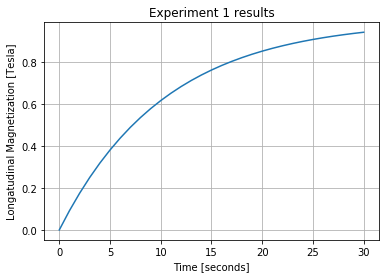

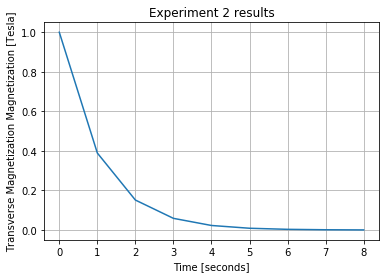

In [3]:
plt.figure(1)
plt.plot(Mz)
plt.grid()
plt.xlabel('Time [seconds]');
plt.ylabel('Longatudinal Magnetization [Tesla]');
plt.title('Experiment 1 results');
plt.show()
plt.figure(2)
plt.plot(Mxy)
plt.grid()
plt.xlabel('Time [seconds]');
plt.ylabel('Transverse Magnetization Magnetization [Tesla]');
plt.title('Experiment 2 results');
plt.show()

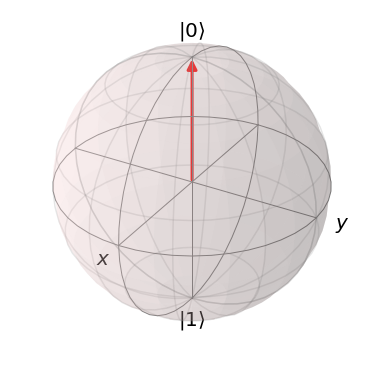

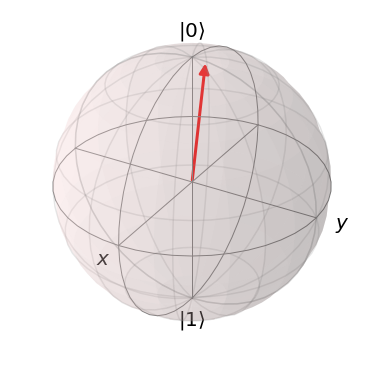

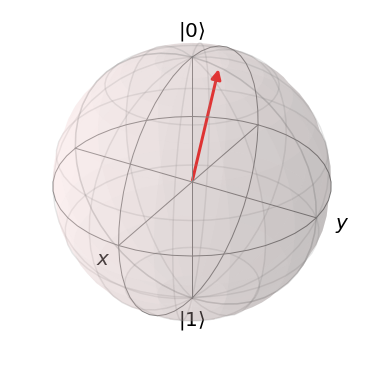

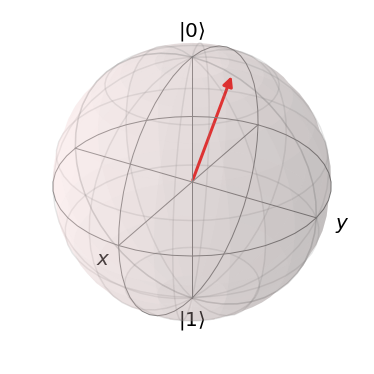

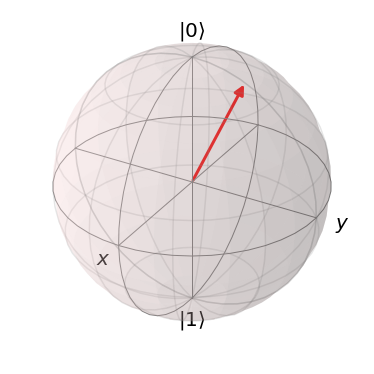

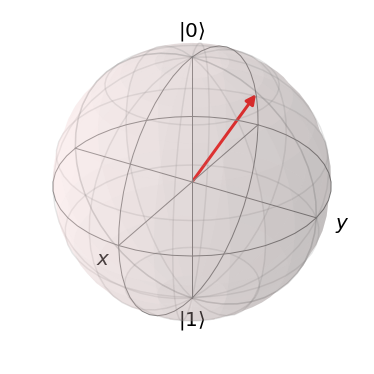

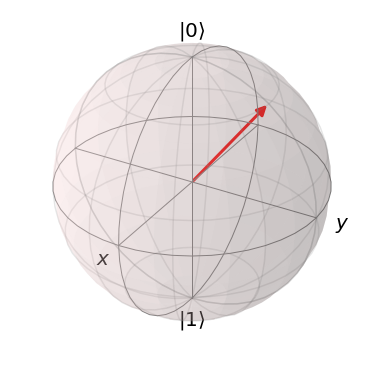

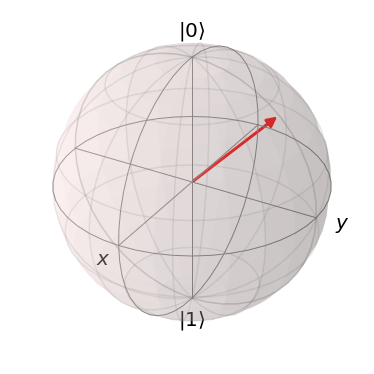

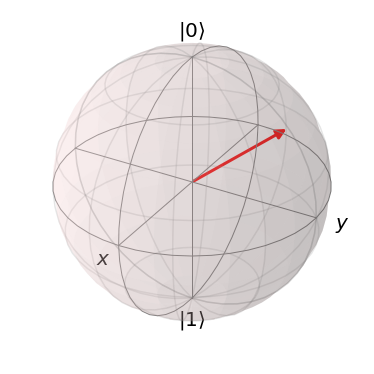

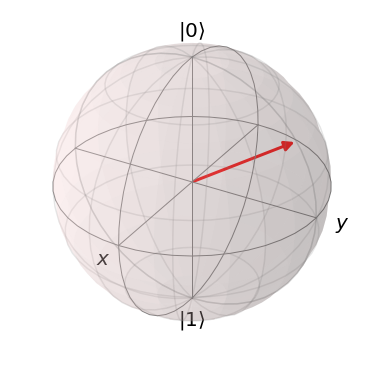

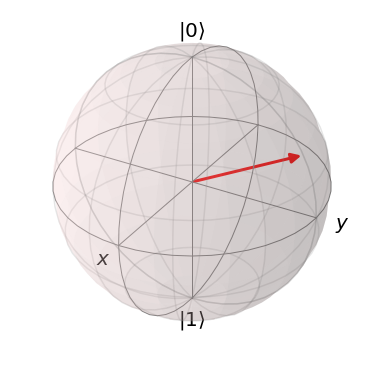

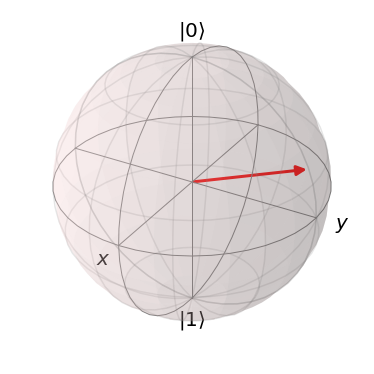

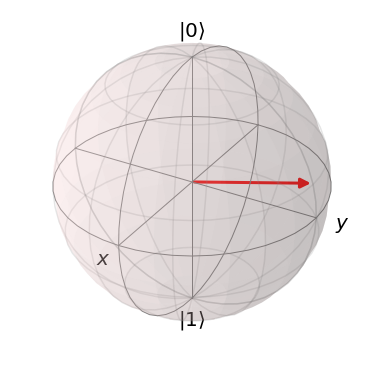

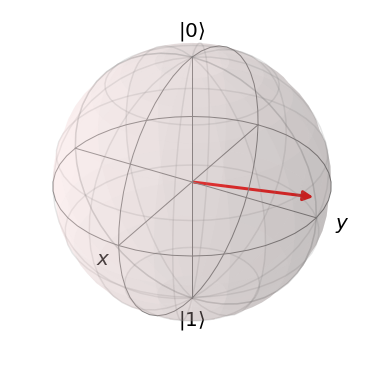

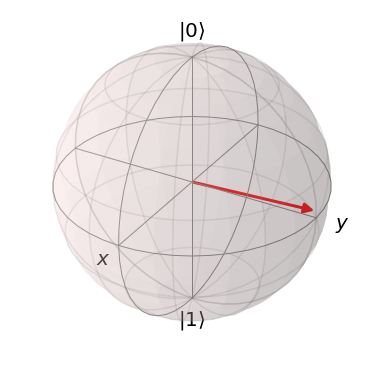

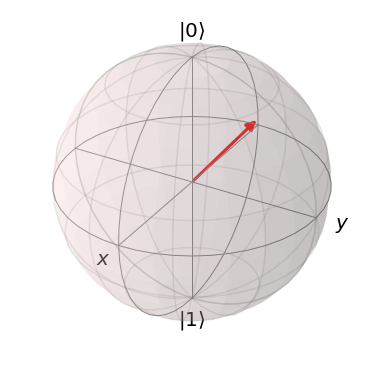

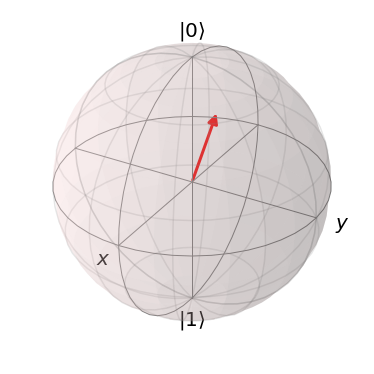

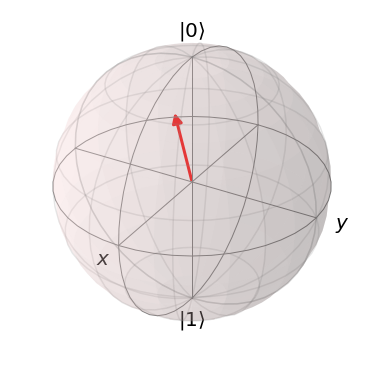

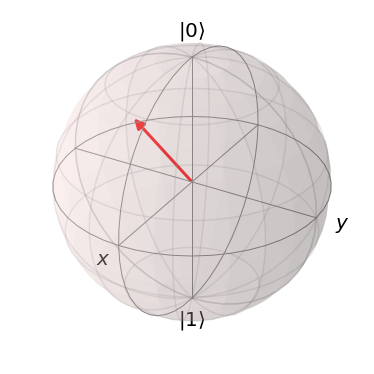

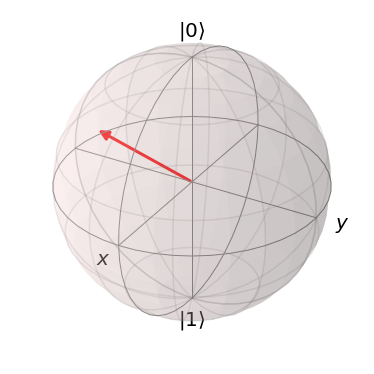

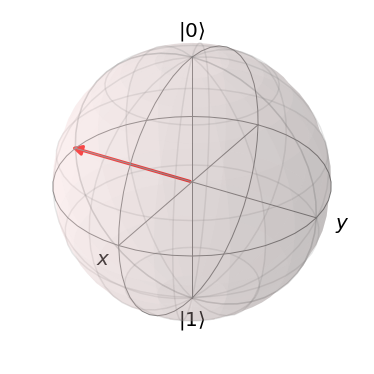

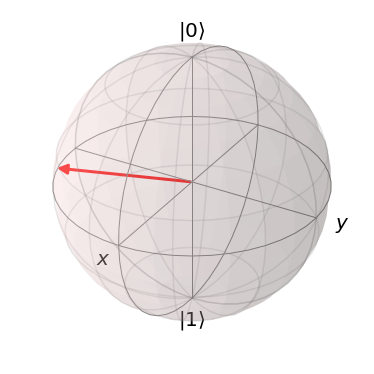

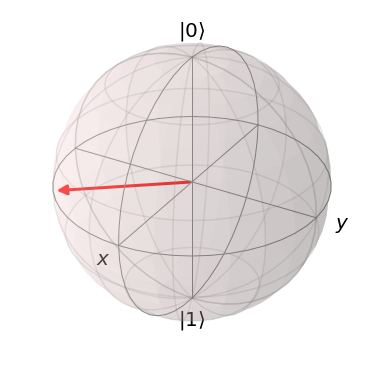

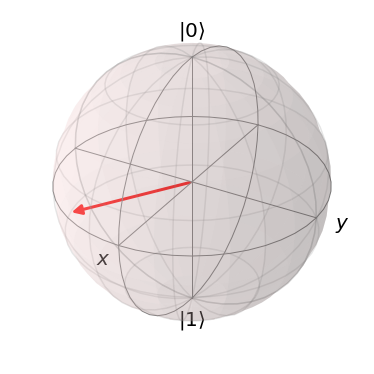

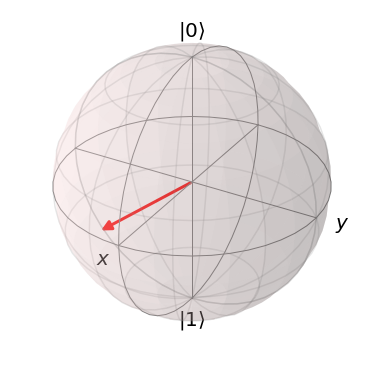

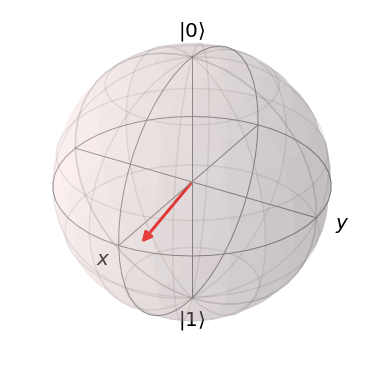

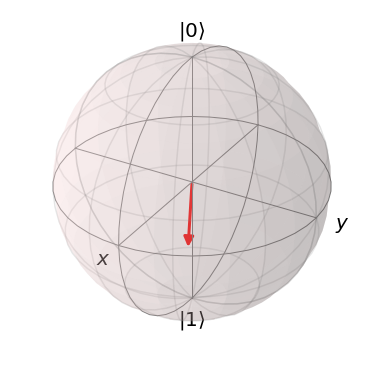

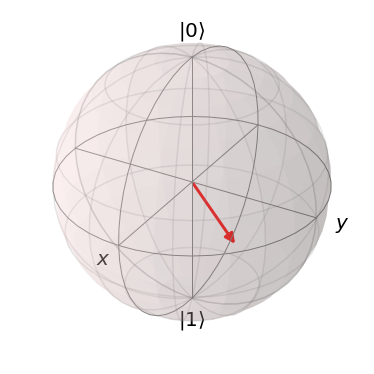

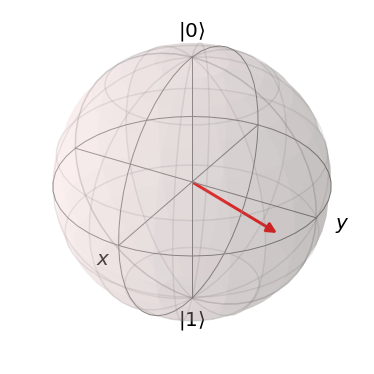

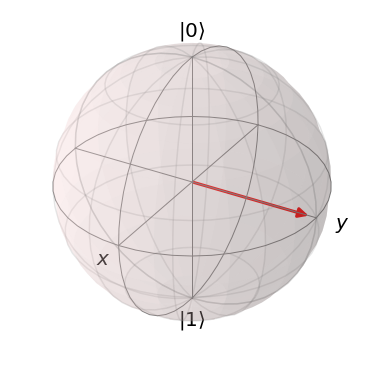

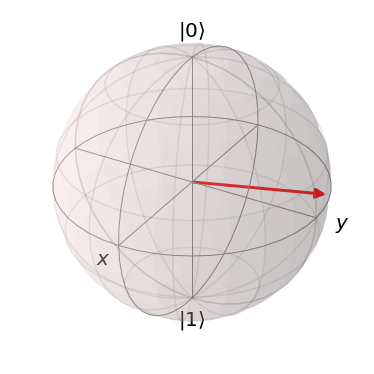

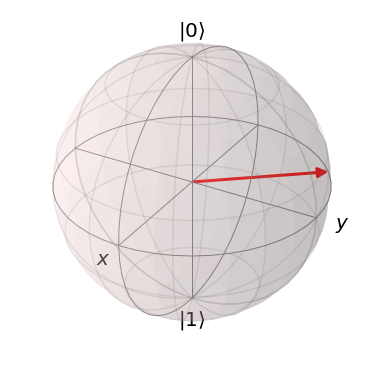

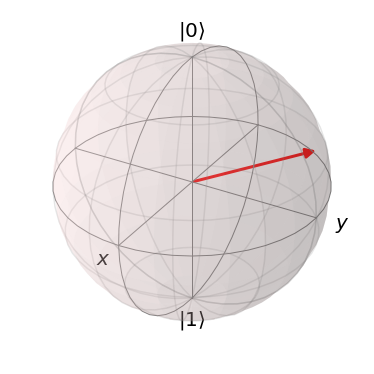

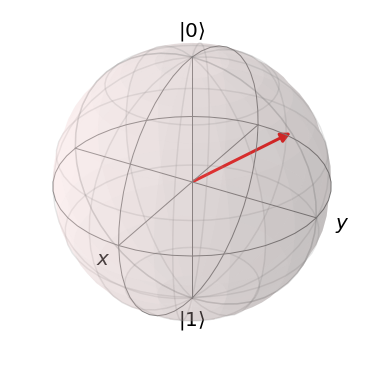

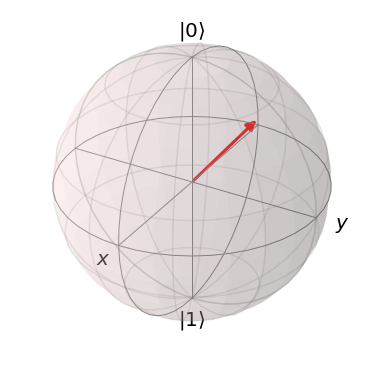

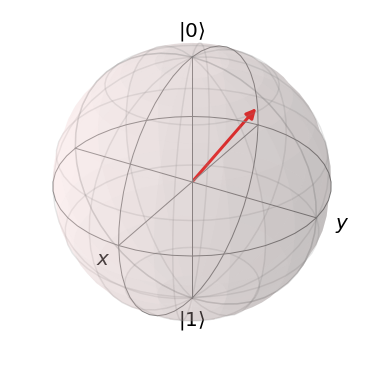

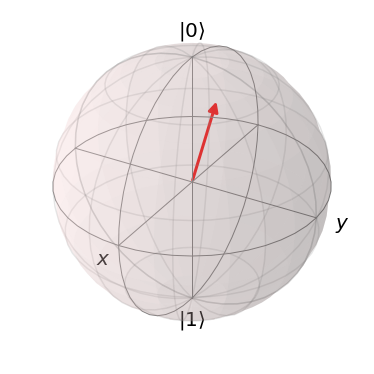

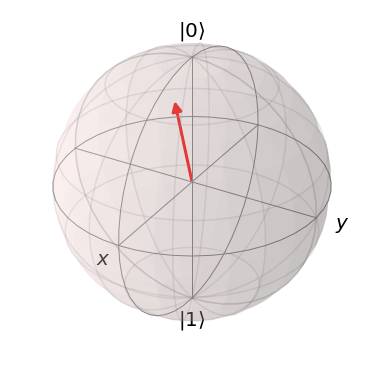

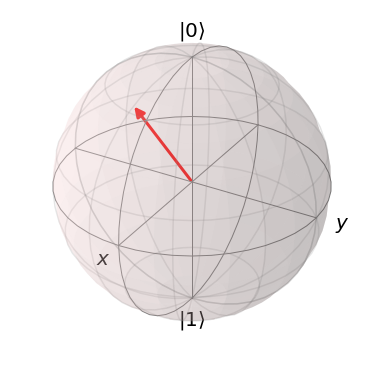

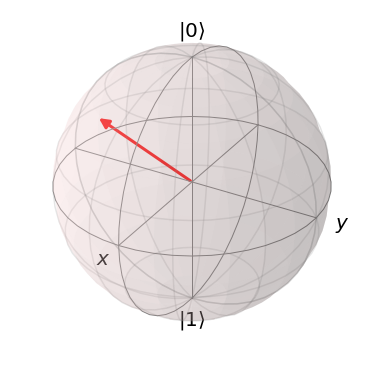

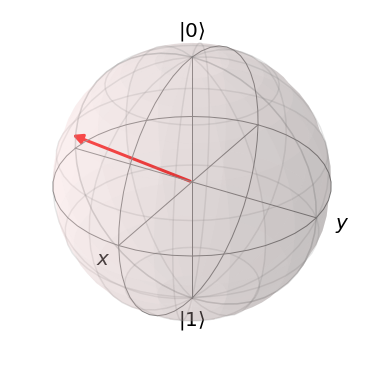

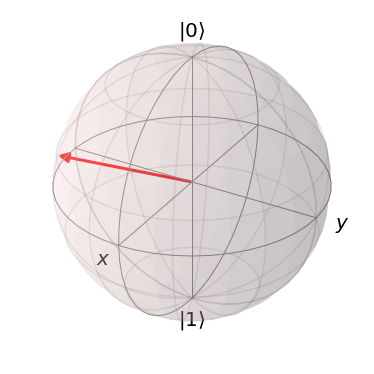

KeyboardInterrupt: 

In [4]:

b = Bloch()
b.show()
%matplotlib notebook
for th in np.linspace(0, pi , 30):
    b.clear()
    %matplotlib notebook
    b.vector_color = ['r']
 # RF pulse = 90 degree
    if th <= pi/2 :
        x=1
        y=np.sin(th)
        z=np.cos(th)
        r       =  1
        b.clear()
        zz = [0 ,sin( th ),cos( th )]
        b.add_vectors(zz)
        %matplotlib notebook
        b.show()
        b.save(dirc='temp')
# Recovery 
    if th > pi/2 :
        x=1
        y=np.sin(th)
        z=np.cos(th)
        r       =  1
        for phi in np.linspace(0, 2*pi, 20):
            b.clear()
            zz = [r * sin((th-pi)) * cos( phi ) ,r * sin( (th-pi) ) * sin( phi ),r * cos( (th-pi) )]
            b.add_vectors(zz)
            %matplotlib notebook

            b.show()
            b.save(dirc='temp')

            b.save(dirc = 'temp')

## Number3
    Load images; show the figures. Calculate the Fourier transform of the images
    
- We load an image for <span style = "color: red;"> **phantom** </span> and apply <span style = "color: blue;"> **fourier transform** </span> on it as shown in figure below

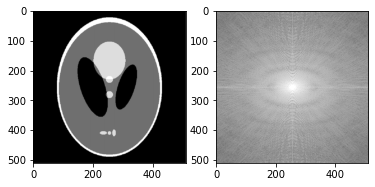

In [3]:
fname = 'phantom.jpg'
image = Image.open(fname).convert("L")
arr = np.asarray(image)

fft_out = np.fft.fft2(arr)
fft_shift=np.fft.fftshift(fft_out)
abs_fft= (20 * np.log(np.abs(fft_shift))).astype(int)

f = plt.figure()
f.add_subplot(1, 2, 1)
plt.imshow(arr, cmap = 'gray', vmin = 0, vmax = 255)
f.add_subplot(1, 2, 2)
plt.imshow(abs_fft, cmap = 'gray', vmin = 0, vmax = 255)
plt.show(block = True)

## Number4
    Define a function that simulates the uniformity effect; where its effect is imposed in the axial (z), but no radial (x or y) dependence on the magnetic field strength. Make a plot of Bz(z).

<IPython.core.display.Javascript object>


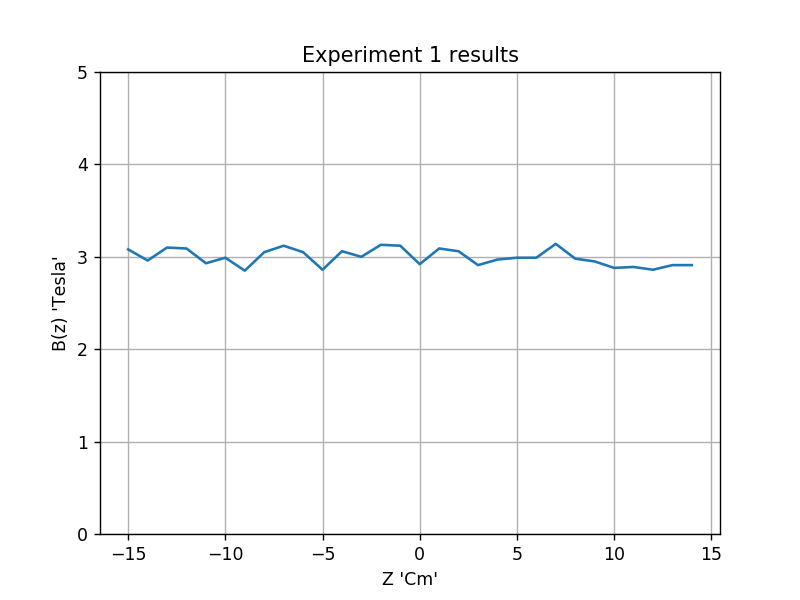

In [5]:
N = 30
y = np.random.randint(285, 315, size = 30)
x = np.arange(-15, 15)
plt.figure(3)
plt.plot(x, y/100)
plt.grid()
plt.title('Experiment 1 results');
plt.ylim(0, 5)
plt.ylabel("B(z) 'Tesla'")
plt.xlabel("Z 'Cm'")
plt.show()